In [1]:
# pd & np libraries to make life easier
import pandas as pd
import numpy as np

# visualizers I'll be using
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns


# to perform stats tests
from scipy import stats

# all sklearn lib's functs
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support


#import all functions created in acquire , prepare & explore
import prepare
import acquire
import model
import explore

# ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [2]:
cat_vars = ['churn', 'contract_type', 'internet_service_type', 'payment_type', 'contract_type_One year', 'contract_type_Two year', 'internet_service_type_Fiber optic', 'internet_service_type_None', 'payment_type_Credit card (automatic)', 'payment_type_Electronic check', 'payment_type_Mailed check']

quant_vars = ['tenure', 'monthly_charges', 'churn_encoded']

In [3]:
# read Telco data from sql
df = acquire.get_telco_data()

df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,2,0002-ORFBO,Female,0,Yes,Yes,9,Yes,...,Yes,Yes,No,Yes,65.6,593.3,No,One year,DSL,Mailed check
1,2,1,1,0003-MKNFE,Male,0,No,No,9,Yes,...,No,No,Yes,No,59.9,542.4,No,Month-to-month,DSL,Mailed check
2,1,2,1,0004-TLHLJ,Male,0,No,No,4,Yes,...,No,No,No,Yes,73.9,280.85,Yes,Month-to-month,Fiber optic,Electronic check
3,1,2,1,0011-IGKFF,Male,1,Yes,No,13,Yes,...,No,Yes,Yes,Yes,98.0,1237.85,Yes,Month-to-month,Fiber optic,Electronic check
4,2,2,1,0013-EXCHZ,Female,1,Yes,No,3,Yes,...,Yes,Yes,No,Yes,83.9,267.4,Yes,Month-to-month,Fiber optic,Mailed check


In [4]:
df = prepare.prep_telco_data(df)

In [5]:
df

,senior_citizen,tenure,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.60,593.30,No,One year,DSL,Mailed check,1,1,...,1,0,0,1,0,0,0,0,0,1
1,0,9,59.90,542.40,No,Month-to-month,DSL,Mailed check,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,4,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,13,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,...,1,0,1,0,0,1,0,0,1,0
4,1,3,83.90,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,No,One year,DSL,Mailed check,1,0,...,0,0,0,1,0,0,0,0,0,1
7039,0,22,85.10,1873.70,Yes,Month-to-month,Fiber optic,Electronic check,0,1,...,0,0,1,0,0,1,0,0,1,0
7040,0,2,50.30,92.75,No,Month-to-month,DSL,Mailed check,0,0,...,0,0,0,0,0,0,0,0,0,1
7041,0,67,67.85,4627.65,No,Two year,DSL,Mailed check,0,1,...,0,0,1,0,1,0,0,0,0,1


In [6]:
#split the data using train_validate_test() from prepare.py
train, validate, test = prepare.train_validate_test(df)

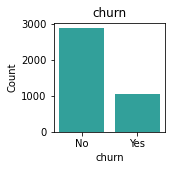

    churn  Count  Percent
No     No   2891    73.43
Yes   Yes   1046    26.57
_________________________________________________________________


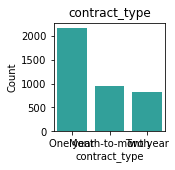

                 contract_type  Count  Percent
Month-to-month        One year   2165    54.99
Two year        Month-to-month    957    24.31
One year              Two year    815    20.70
_________________________________________________________________


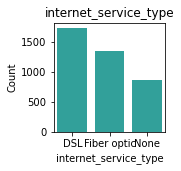

            internet_service_type  Count  Percent
Fiber optic                   DSL   1722    43.74
DSL                   Fiber optic   1348    34.24
None                         None    867    22.02
_________________________________________________________________


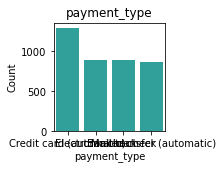

                                        payment_type  Count  Percent
Electronic check             Credit card (automatic)   1289    32.74
Credit card (automatic)             Electronic check    895    22.73
Mailed check                            Mailed check    891    22.63
Bank transfer (automatic)  Bank transfer (automatic)    862    21.89
_________________________________________________________________


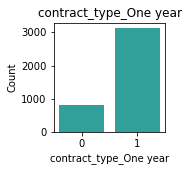

   contract_type_One year  Count  Percent
0                       1   3122     79.3
1                       0    815     20.7
_________________________________________________________________


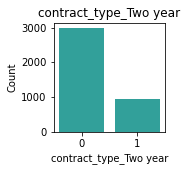

   contract_type_Two year  Count  Percent
0                       0   2980    75.69
1                       1    957    24.31
_________________________________________________________________


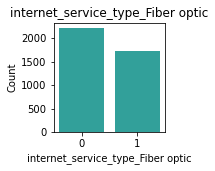

   internet_service_type_Fiber optic  Count  Percent
0                                  0   2215    56.26
1                                  1   1722    43.74
_________________________________________________________________


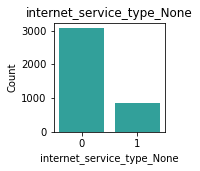

   internet_service_type_None  Count  Percent
0                           0   3070    77.98
1                           1    867    22.02
_________________________________________________________________


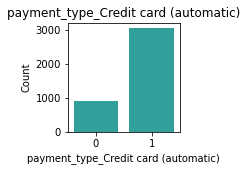

   payment_type_Credit card (automatic)  Count  Percent
0                                     1   3042    77.27
1                                     0    895    22.73
_________________________________________________________________


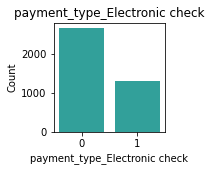

   payment_type_Electronic check  Count  Percent
0                              0   2648    67.26
1                              1   1289    32.74
_________________________________________________________________


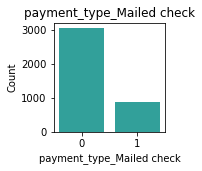

   payment_type_Mailed check  Count  Percent
0                          0   3046    77.37
1                          1    891    22.63
_________________________________________________________________


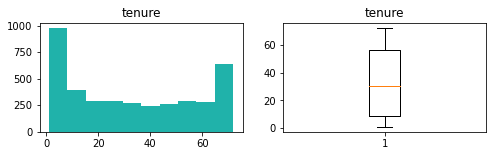

count    3937.000000
mean       32.775210
std        24.709604
min         1.000000
25%         9.000000
50%        30.000000
75%        56.000000
max        72.000000
Name: tenure, dtype: float64


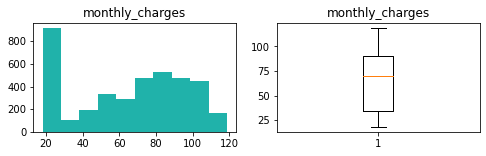

count    3937.000000
mean       64.805131
std        30.294804
min        18.250000
25%        34.700000
50%        70.250000
75%        90.300000
max       118.650000
Name: monthly_charges, dtype: float64


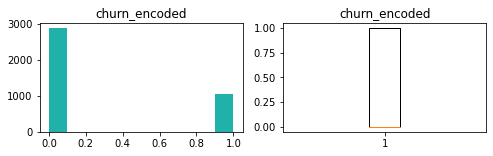

count    3937.000000
mean        0.265685
std         0.441753
min         0.000000
25%         0.000000
50%         0.000000
75%         1.000000
max         1.000000
Name: churn_encoded, dtype: float64


In [8]:
explore.explore_univariate(train, cat_vars, quant_vars)

In [13]:
explore.freq_table(train, 'churn')

,contract_type,Count,Percent
Month-to-month,One year,2165,54.99
Two year,Month-to-month,957,24.31
One year,Two year,815,20.70


In [15]:
explore.freq_table(train, 'contract_type')

,contract_type,Count,Percent
Month-to-month,One year,2165,54.99
Two year,Month-to-month,957,24.31
One year,Two year,815,20.70


In [16]:
explore.freq_table(train, 'payment_type')

,payment_type,Count,Percent
Electronic check,Credit card (automatic),1289,32.74
Credit card (automatic),Electronic check,895,22.73
Mailed check,Mailed check,891,22.63
Bank transfer (automatic),Bank transfer (automatic),862,21.89


In [14]:
explore.freq_table(train, 'internet_service_type')

,internet_service_type,Count,Percent
Fiber optic,DSL,1722,43.74
DSL,Fiber optic,1348,34.24
None,None,867,22.02


(Text(0.5, 1.0, 'tenure'),
 count    3937.000000
 mean       32.775210
 std        24.709604
 min         1.000000
 25%         9.000000
 50%        30.000000
 75%        56.000000
 max        72.000000
 Name: tenure, dtype: float64)

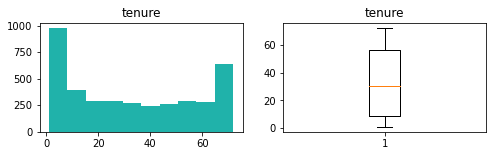

In [18]:
explore.explore_univariate_quant(train, 'tenure')

(Text(0.5, 1.0, 'monthly_charges'),
 count    3937.000000
 mean       64.805131
 std        30.294804
 min        18.250000
 25%        34.700000
 50%        70.250000
 75%        90.300000
 max       118.650000
 Name: monthly_charges, dtype: float64)

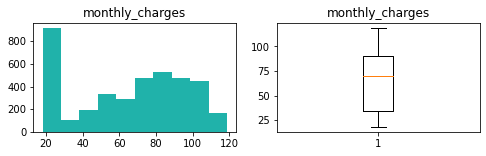

In [19]:
explore.explore_univariate_quant(train, 'monthly_charges')

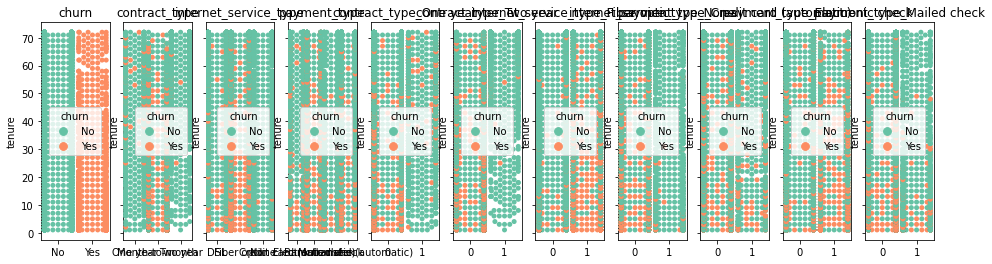

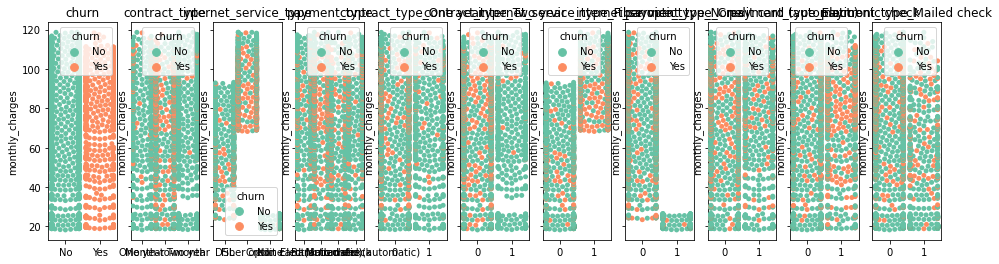

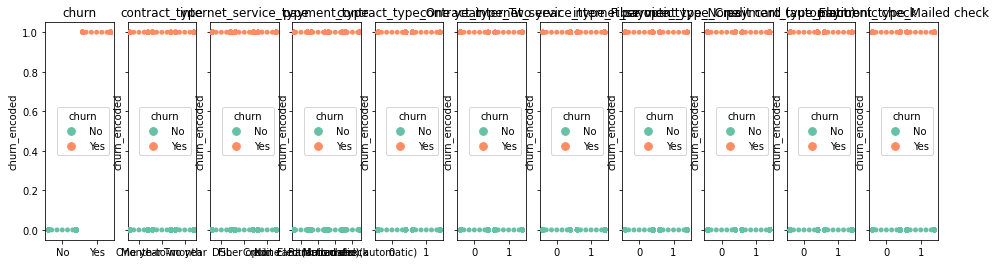

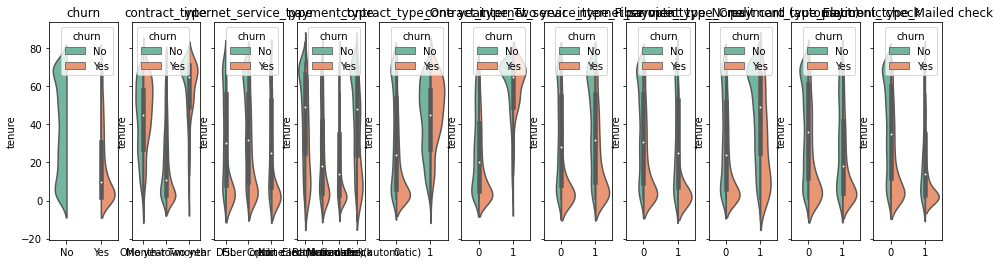

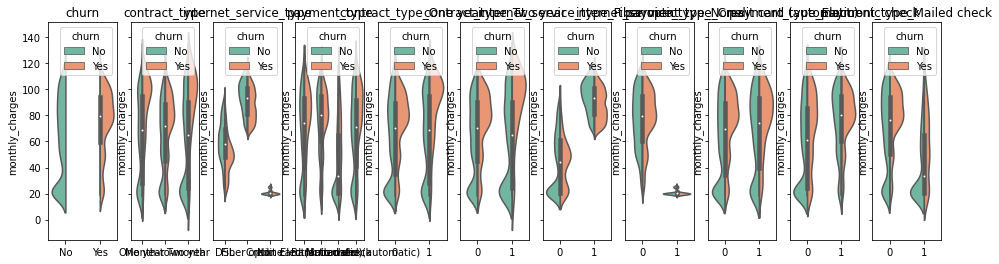

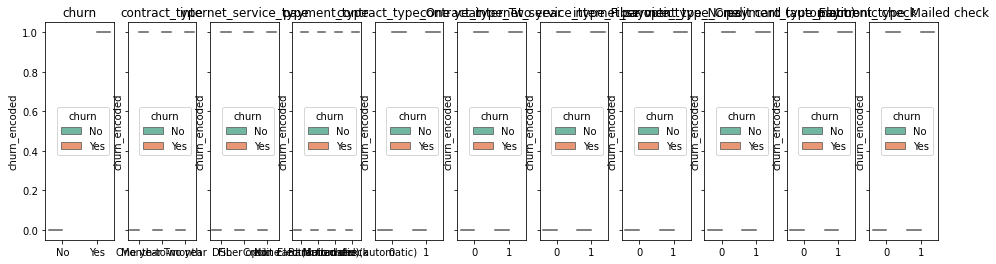

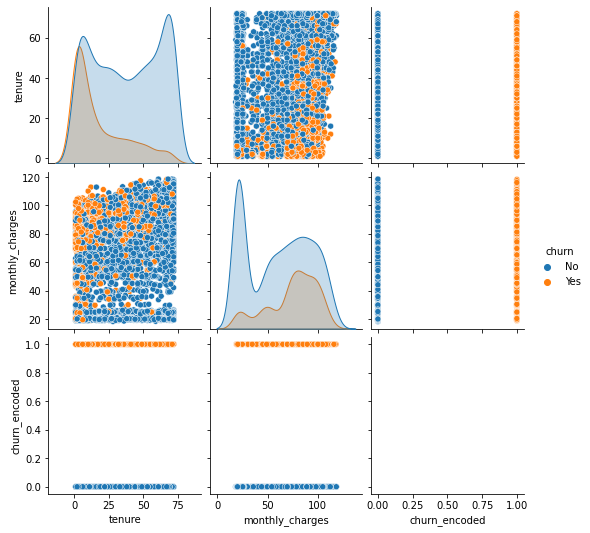

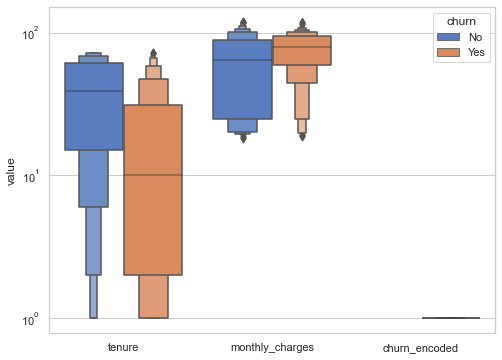

In [23]:
explore.explore_multivariate(train, 'churn', cat_vars, quant_vars)

monthly_charges 
____________________



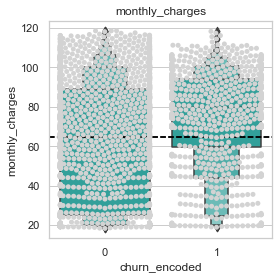

                count       mean        std    min     25%    50%      75%  \
churn_encoded                                                                
0              2891.0  61.218091  31.349533  18.25  25.000  64.50  89.0250   
1              1046.0  74.719216  24.593969  18.85  59.525  79.85  94.2375   

                  max  
churn_encoded          
0              118.65  
1              118.35   


Mann-Whitney Test:
 MannwhitneyuResult(statistic=1140707.5, pvalue=4.601429737222539e-32)

____________________



In [26]:
explore.explore_bivariate_quant(train, 'churn_encoded', 'monthly_charges')

contract_type 
_____________________

         chi2        p-value  degrees of freedom
0  664.657249  4.693667e-145                   2

observed:
 churn_encoded      0     1   All
contract_type                   
Month-to-month  1238   927  2165
One year         726    89   815
Two year         927    30   957
All             2891  1046  3937

expected:
              0           1
0  1589.792990  575.207010
1   598.467107  216.532893
2   702.739903  254.260097


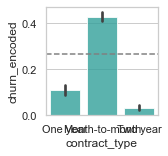


_____________________



In [34]:
explore.explore_bivariate_categorical(train, 'churn_encoded', 'contract_type')

internet_service_type 
_____________________

         chi2       p-value  degrees of freedom
0  439.766148  3.206227e-96                   2

observed:
 churn_encoded             0     1   All
internet_service_type                  
DSL                    1101   247  1348
Fiber optic             987   735  1722
None                    803    64   867
All                    2891  1046  3937

expected:
              0           1
0   989.857252  358.142748
1  1264.491237  457.508763
2   636.651511  230.348489


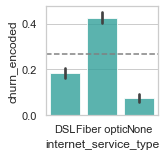


_____________________



In [35]:
explore.explore_bivariate_categorical(train, 'churn_encoded', 'internet_service_type')

payment_type 
_____________________

         chi2       p-value  degrees of freedom
0  338.485229  4.643588e-73                   3

observed:
 churn_encoded                 0     1   All
payment_type                               
Bank transfer (automatic)   713   149   862
Credit card (automatic)     750   145   895
Electronic check            708   581  1289
Mailed check                720   171   891
All                        2891  1046  3937

expected:
             0           1
0  632.979934  229.020066
1  657.212344  237.787656
2  946.532639  342.467361
3  654.275083  236.724917


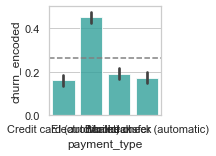


_____________________



In [38]:
explore.explore_bivariate_categorical(train, 'churn_encoded', 'payment_type')

internet_service_type 
_____________________

          chi2  p-value  degrees of freedom
0  6798.732251      0.0                2660

observed:
 monthly_charges        18.25  18.4  18.55  18.75  18.85  18.9  18.95  19.0  \
internet_service_type                                                        
DSL                        0     0      0      0      0     0      0     0   
Fiber optic                0     0      0      0      0     0      0     0   
None                       1     1      1      1      4     2      3     4   
All                        1     1      1      1      4     2      3     4   

monthly_charges        19.05  19.1  ...  116.75  116.95  117.35  117.45  \
internet_service_type               ...                                   
DSL                        0     0  ...       0       0       0       0   
Fiber optic                0     0  ...       1       1       1       1   
None                       7     5  ...       0       0       0       0   
All       

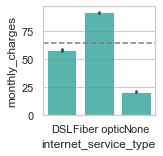


_____________________



In [40]:
explore.explore_bivariate_categorical(train, 'monthly_charges', 'internet_service_type')

In [ ]:
# A. Distributions See above

# B. Set Hypothesis

# H0# : Mean of monthly charges of churned customers >= Mean of monthly charges of all customers
# Ha# : Mean of monthly charges of churned customers < Mean of monthly charges of all customers

# C. Set Alpha See above

# D. Assumptions See above

# E. Compute test statistics

<AxesSubplot:>

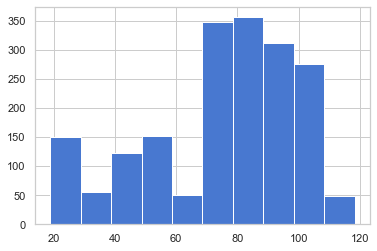

In [48]:
#one tailed t test, monthly charges are higher for customers who churn than those that dont
churn_sample = df[df.churn == 'Yes'].monthly_charges

churn_sample.hist()

In [49]:
#Ho: mean of monthly charges of churned customers is >= mean of monthly charges of all customers
#Ha: mean of monthly charges of churned customers is < mean of monthly charges of all customers
alpha=.05
churn_sample = df[df.churn == 'Yes'].monthly_charges
overall_mean = df.monthly_charges.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

16.90140234289535 4.80131988951768e-60 0.05


In [54]:
if p/2 < alpha:
    print("We fail to reject Ho")
elif t > 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

We fail to reject Ho


<AxesSubplot:>

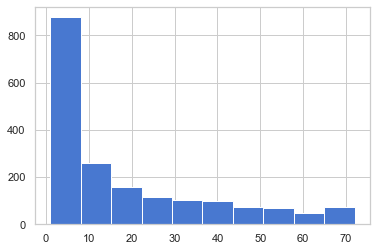

In [47]:
#one tail t test, majority of churned customers are month to month customers, aka tenure less than 12
churn_sample = df[df.churn == 'Yes'].tenure

churn_sample.hist()

In [52]:
#Ho: mean length tenure of churned customers is <= mean length tenure of all customers
#Ha: mean length tenure of churned customers is > mean length tenure of all customers
alpha=.05
churn_sample = df[df.churn == 'Yes'].tenure
overall_mean = df.tenure.mean()

t, p = stats.ttest_1samp(churn_sample, overall_mean)

print(t, p/2, alpha)

-31.96865819544077 1.508565587390666e-179 0.05


In [53]:
if p/2 > alpha:
    print("We fail to reject Ho")
elif t < 0:
    print("We fail to reject Ho")
else:
    print("We reject Ho")

We fail to reject Ho


<AxesSubplot:>

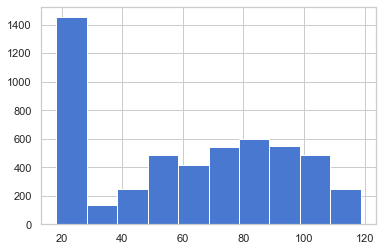

In [60]:

no_churn_sample = df[df.churn == 'No'].monthly_charges

no_churn_sample.hist()

In [ ]:
# charges of customers who churn significantly different than those who do not churn

# Ho: charges of customers who churn equals that of those who don't churn.

# Ha: charges of customers who churn is not equal to that of those who don't churn.

In [61]:
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var=False)

t, p
#-t value and 0 p, significantly different

(-69.25919853046089, 0.0)

In [68]:
df

,senior_citizen,tenure,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type,gender_encoded,partner_encoded,...,streaming_tv_Yes,streaming_movies_No internet service,streaming_movies_Yes,contract_type_One year,contract_type_Two year,internet_service_type_Fiber optic,internet_service_type_None,payment_type_Credit card (automatic),payment_type_Electronic check,payment_type_Mailed check
0,0,9,65.60,593.30,No,One year,DSL,Mailed check,1,1,...,1,0,0,1,0,0,0,0,0,1
1,0,9,59.90,542.40,No,Month-to-month,DSL,Mailed check,0,0,...,0,0,1,0,0,0,0,0,0,1
2,0,4,73.90,280.85,Yes,Month-to-month,Fiber optic,Electronic check,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,13,98.00,1237.85,Yes,Month-to-month,Fiber optic,Electronic check,0,1,...,1,0,1,0,0,1,0,0,1,0
4,1,3,83.90,267.40,Yes,Month-to-month,Fiber optic,Mailed check,1,1,...,1,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,13,55.15,742.90,No,One year,DSL,Mailed check,1,0,...,0,0,0,1,0,0,0,0,0,1
7039,0,22,85.10,1873.70,Yes,Month-to-month,Fiber optic,Electronic check,0,1,...,0,0,1,0,0,1,0,0,1,0
7040,0,2,50.30,92.75,No,Month-to-month,DSL,Mailed check,0,0,...,0,0,0,0,0,0,0,0,0,1
7041,0,67,67.85,4627.65,No,Two year,DSL,Mailed check,0,1,...,0,0,1,0,1,0,0,0,0,1


In [74]:
r_monthly_charges, _ = stats.pearsonr(df.churn_encoded, df.monthly_charges)
r_tenure, _ = stats.pearsonr(df.churn_encoded, df.tenure)

print('Correlation between churn and monthly_charges')
print(f'  r = {r_monthly_charges:.3f}')
print('Correlation between churn and tenure')
print(f'  r = {r_tenure:.3f}')

Correlation between churn and monthly_charges
  r = 0.193
Correlation between churn and tenure
  r = -0.354


In [76]:
r, p = stats.pearsonr(df.churn_encoded, df.monthly_charges)
r, p

(0.1928582184700866, 6.760843117985555e-60)

In [77]:
index = ['Churn', 'No Churn']
columns = ['contract_type', 'internet_service_type']

observed = pd.DataFrame([[100, 50], [120, 28]], index=index, columns=columns)
n = observed.values.sum()

expected = pd.DataFrame([[.372, .132], [.367, .130]], index=index, columns=columns) * n

chi2 = ((observed - expected)**2 / expected).values.sum()

nrows, ncols = observed.shape

degrees_of_freedom = (nrows - 1) * (ncols - 1)

p = stats.chi2(degrees_of_freedom).sf(chi2)

print('Observed')
print(observed)
print('---\nExpected')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed
          Product A  Product B
Churn           100         50
No Churn        120         28
---
Expected
          Product A  Product B
Churn       110.856     39.336
No Churn    109.366     38.740
---

chi^2 = 7.9656
p     = 0.0048


In [84]:
pd.crosstab(train.churn, train.internet_service_type, margins=True, normalize=True)

internet_service_type,DSL,Fiber optic,None,All
churn,,,,
No,0.279655,0.250699,0.203962,0.734315
Yes,0.062738,0.186690,0.016256,0.265685
All,0.342393,0.437389,0.220218,1.000000


In [87]:
istchurn=pd.crosstab(train.churn, train.internet_service_type, margins=True, normalize=True)

In [88]:
chi2, p, degf, expected=stats.chi2_contingency(istchurn)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[100  50]
 [120  28]]
---
Expected

[[0.25142424 0.32118142 0.16170981 0.73431547]
 [0.09096844 0.11620746 0.05850863 0.26568453]
 [0.34239268 0.43738887 0.22021844 1.        ]]
---

chi^2 = 0.1117
p     = 1.0000


In [89]:
pd.crosstab(train.churn, train.contract_type, margins=True, normalize=True)

contract_type,Month-to-month,One year,Two year,All
churn,,,,
No,0.314453,0.184404,0.235458,0.734315
Yes,0.235458,0.022606,0.007620,0.265685
All,0.549911,0.207010,0.243078,1.000000


In [90]:
ctchurn = pd.crosstab(train.churn, train.contract_type, margins=True, normalize=True)

In [91]:
chi2, p, degf, expected=stats.chi2_contingency(ctchurn)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[100  50]
 [120  28]]
---
Expected

[[0.40380823 0.15201095 0.17849629 0.73431547]
 [0.14610287 0.05499946 0.06458219 0.26568453]
 [0.5499111  0.20701041 0.24307849 1.        ]]
---

chi^2 = 0.1688
p     = 0.9999


In [92]:
pd.crosstab(train.churn, train.payment_type, margins=True, normalize=True)

payment_type,Bank transfer (automatic),Credit card (automatic),Electronic check,Mailed check,All
churn,,,,,
No,0.181102,0.19050,0.179832,0.182880,0.734315
Yes,0.037846,0.03683,0.147574,0.043434,0.265685
All,0.218948,0.22733,0.327407,0.226314,1.000000


In [93]:
ptchurn = pd.crosstab(train.churn, train.payment_type, margins=True, normalize=True)

In [94]:
chi2, p, degf, expected=stats.chi2_contingency(ptchurn)
print('Observed\n')
print(observed.values)
print('---\nExpected\n')
print(expected)
print('---\n')
print(f'chi^2 = {chi2:.4f}')
print(f'p     = {p:.4f}')

Observed

[[100  50]
 [120  28]]
---
Expected

[[0.16077722 0.16693227 0.24041977 0.1661862  0.73431547]
 [0.05817121 0.06039819 0.08698688 0.06012825 0.26568453]
 [0.21894844 0.22733045 0.32740665 0.22631445 1.        ]]
---

chi^2 = 0.0860
p     = 1.0000
